In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.data.shape

(1797, 64)

In [8]:
digits.target.shape

(1797,)

In [10]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [11]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

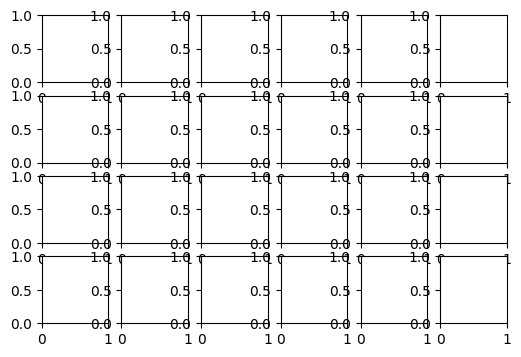

In [13]:
import matplotlib.pyplot as plt
figure,axes = plt.subplots(nrows=4,ncols=6,figsize=(6,4))

In [16]:
for item in zip(axes.ravel(),digits.images,digits.target):
    axes,images,target = item
    axes.imshow(images,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()
    

AttributeError: 'Axes' object has no attribute 'ravel'

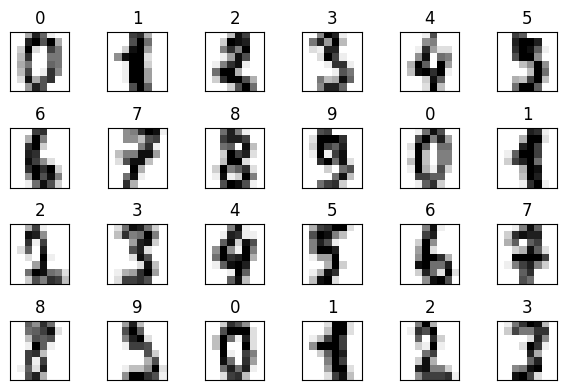

Training data shape: (1437, 64)
Testing data shape: (360, 64)
Training labels shape: (1437,)
Testing labels shape: (360,)
Predictions: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
Expected: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]
Model Accuracy: 0.9861111111111112


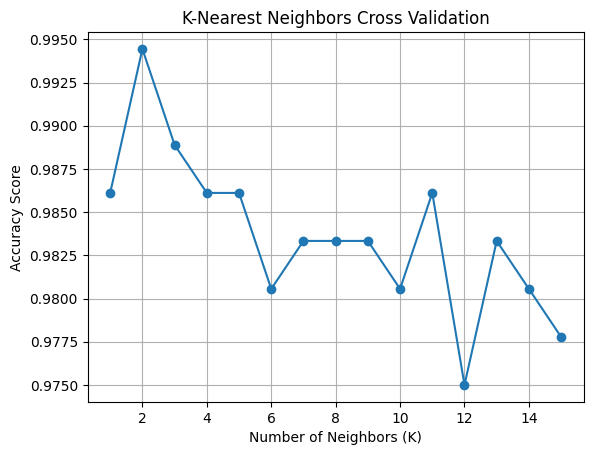

In [19]:
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
 
# Load digits dataset
digits = load_digits()
 
# Plot sample images from the dataset
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
 
for ax, image, target in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(target)
 
plt.tight_layout()
plt.show()
 
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.2)
 
# Print shapes of datasets
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
 
# Train and evaluate KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
 
# Print first 20 predictions
print("Predictions:", pred[:20])
print("Expected:", y_test[:20])
 
# Print model accuracy
print("Model Accuracy:", knn.score(x_test, y_test))
 
# Find optimal K using cross-validation
scores = []
 
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
 
# Plot accuracy vs. K values
plt.plot(range(1, 16), scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Score")
plt.title("K-Nearest Neighbors Cross Validation")
plt.grid(True)
plt.show()